In [2]:
import numpy as np
import sklearn
import torch
import scipy
from matplotlib import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/artem/Main/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [84]:
N_SAMPLES  = 50
def simple_data_generator(size, random_state=None):
    np.random.seed(random_state)
    return np.random.random(size=(size, 2))

#density_square = [(x1, x2, y1, y2), (...), ...] - coordinates of square with assigned dencity (dencity * size)
def data_generator(size = N_SAMPLES, density_square=[(0, 0.2, 0, 1)], density=[0.5], random_state=None):
    np.random.seed(random_state)
    gen_data_size = 0
    data=np.array([]).reshape(0,2)
    for d, square in zip(density, density_square):
        if(d > 1):
            print("density must be float in range [0, 1]:", density)
            return
        
        size_i=int(size * d)
        x_data_i = np.random.random(size=(size_i, 1)) * (square[1] - square[0]) + square[0]
        y_data_i = np.random.random(size=(size_i, 1)) * (square[3] - square[2]) + square[2]
        data = np.vstack((data, hstack((x_data_i, y_data_i))))
        #print(data)
        gen_data_size += size_i
    if gen_data_size < size:
        data = np.vstack((data, np.random.random(size=(size-gen_data_size, 2))))
    return data

test_datasets_lite = [
    data_generator(density=[0.7]),
    data_generator(100, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45]),
    data_generator(100, [(0, 1, 0, 0.2)], [1]),
    data_generator(100, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4]),
    data_generator(100, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45]),
    data_generator(100, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45]),
    data_generator(100, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19]),
]

test_datasets_medium = [
    data_generator(density=[0.7]),
    data_generator(400, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45]),
    data_generator(400, [(0, 1, 0, 0.2)], [1]),
    data_generator(400, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4]),
    data_generator(400, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45]),
    data_generator(400, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45]),
    data_generator(400, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19]),
]

test_datasets_hard = [
    data_generator(density=[0.7]),
    data_generator(1000, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45]),
    data_generator(1000, [(0, 1, 0, 0.2)], [1]),
    data_generator(1000, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4]),
    data_generator(1000, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45]),
    data_generator(1000, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45]),
    data_generator(1000, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19]),
]

test_datasets_pro = [
    data_generator(density=[0.7]),
    data_generator(5000, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45]),
    data_generator(5000, [(0, 1, 0, 0.2)], [1]),
    data_generator(5000, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4]),
    data_generator(5000, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45]),
    data_generator(5000, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45]),
    data_generator(5000, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19]),
]

In [89]:
def ApproxPlot(x, y, predict, name=""):
    """
    Build 2 graphices in the same plot:
    scatter data plot and approximation curve
    """
    y_pred = [predict(x_i) for x_i in x]
    loss = np.abs(y - y_pred).sum() / y.shape[0]
    lin_loss = np.abs(y - x).sum() / y.shape[0]
    print(name, "loss =", loss)
    print("liear function loss =", lin_loss)
    
    plt.figure(figsize=[11,11])
    plt.scatter(x, y, alpha=0.8, marker=".", label="training points")
    x_approx = np.linspace(0, 1, 1000)
    y_approx = [predict(x_i) for x_i in x_approx]
    plt.plot(x_approx, y_approx, c = 'r', linewidth=0.5, label="Approximation curve")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(0, 1.)
    plt.ylim(0, 1.)
    plt.legend(loc='best')
    plt.show()

In [90]:
def RunTests(estimator, dataset):
    for i, data in enumerate(dataset):
        print("Dataset", i, ":")
        %time losses = estimator.fit(data[:, 0], data[:, 1])
        ApproxPlot(data[:, 0], data[:, 1], estimator.PredictProba)
        plt.scatter(np.arange(0, len(losses) + 1), losses)
        plt.title("Losses")
        plt.xlabel("Epoch")
        plt.ylabel("L1 discrepancy")
        plt.legend(loc="best")
        plt.show()

In [80]:
def DBeta__(alpha, beta, x):
    return (x ** (alpha - 1)) * ((1 - x) ** (beta - 1))

def Beta(alpha, beta, x, N=100):
    if x == 0:
        return x 
    
    res1 = torch.tensor(0,     dtype = float)
    res2 = torch.tensor(0,     dtype = float)
    step = torch.tensor(1 / N, dtype = float)
    i = 0
    last = x
    
    while step * i + step / 2 < last:
        #print("i =", i)
        res1 += DBeta__(alpha, beta, step * i + step / 2) * step
        i += 1
        
    res2 = res1.clone()
    while step * i + step / 2 < 1:
        res2 += DBeta__(alpha, beta, step * i + step / 2) * step
        i += 1
    
    return res1 / res2

In [59]:
def ScipyBeta(alpha, beta, x):
    a = scipy.special.betainc(alpha, beta, x)
    b = scipy.special.betainc(alpha, beta, torch.ones(x.shape, dtype=float))
    return a / b

In [81]:
from scipy import stats
#from torch.distributions.beta import Beta
#import tensorflow as tf
#import tensorflow_probability as tfp
#from tensorflow_probability.python import distributions

InitAB = []

class BetaRegression:
    def __init__(self):
        pass
        
    def LossFunc(self, x, y):
        loss = 0
        for i, x_i in enumerate(x):
            loss += torch.abs(self.PredictProba(x_i) - y[i])
        return loss
    
    def PredictProba(self, x):
        #print("predict =", Beta(self.alpha, self.beta, x))
        return Beta(self.alpha, self.beta, x)
        #b = Beta(self.alpha, self.beta)
        #print("Torch beta cdf =", b.log_prob(x))
        #print("Scipy beta cdf =", stats.beta.pdf(self.alpha.detach().numpy(), self.beta.detach().numpy(), x), self.alpha.detach().numpy(), self.beta.detach().numpy())
        #ret = stats.beta.cdf(self.alpha.detach().numpy(), self.beta.detach().numpy(), x)
        #if isinstance(a, numpy.ndarray):
        #    return np.array(ret)
        #else:
        #    return torch.from_numpy(stats.beta.cdf(self.alpha.detach().numpy(), self.beta.detach().numpy(), x))
    
    def InitParams(self, random_state=None):
        if random_state != None:
            np.random.seed(random_state)
        #self.alpha = tf.Variable(initial_value = np.random.random(1), dtype=tf.float32, name="alpha")
        #self.beta  = tf.Variable(initial_value = np.random.random(1), dtype=tf.float32, name="beta")
        #self.model = distributions.Beta(self.alpha, self.beta).cdf(x)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.alpha = torch.tensor(np.random.random(1)[0], dtype=float) #(torch.randn(1, dtype=torch.float) + 1) / 2
        self.alpha.to(device)
        self.alpha.requires_grad_()
    
        self.beta = torch.tensor(np.random.random(1)[0], dtype=float) #(torch.randn(1, dtype=torch.float) + 1) / 2
        self.beta.to(device)
        self.beta.requires_grad_()
    
    def fit(self, x, y, num_epochs=100, lr=1e-2, random_state=None):
        #self.ab = tf.constant([np.random.random(1)[0], np.random.random(1)[0]], dtype=tf.float32, name="ab")
        #self.model = distributions.Beta(self.alpha, self.beta).cdf(x)
        #mae_object = tf.keras.losses.MeanAbsoluteError()
        #loss_func  = mae_object(y, self.PredictProba(x))
        #optimizer  = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = lr)
        #feed_dict  = {tf_data_x : x, tf_data_y : y}
        self.InitParams(random_state)
        if isinstance(x, torch.Tensor) == False:
            x = torch.tensor(x, dtype=float, requires_grad = False)
        if isinstance(y, torch.Tensor) == False:
            y = torch.tensor(y, dtype=float, requires_grad = False)
        loss = []
        print(x, y)
        
        optimizer = torch.optim.SGD([self.alpha, self.beta], lr=lr)
        
        InitAB = [self.alpha.item(), self.beta.item()]
        
        for _ in np.arange(num_epochs):
            #with tf.GradientTape() as g:
                #g.watch(self.ab)     
            #Calculate losses
            #mae_object = tf.keras.losses.MeanAbsoluteError()
            #loss_i  = mae_object(y, self.PredictProba(x))            
            #Calculate gradient
            #print("alpha, beta =", self.ab)
            #gr = g.gradient(loss_i, self.ab)
            #print("grad = ", gr)
            #grad_ab    = gr / x.shape[0]
            #print(grad_ab)
            #new alpha, beta
            #self.ab -= lr * grad_ab
            #add loss to list
            #print("loss_i =", o)
            
            loss_i = self.LossFunc(x, y)
            loss_i.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            #a_step = lr * self.alpha.grad
            #b_step = lr * self.beta.grad
            #print("alpha =", self.alpha)
            #print("beta =", self.beta)
            #print("gradA=", self.alpha.grad)
            #print("gradB=", self.beta.grad)
            #self.alpha.data -= a_step if self.alpha.data > a_step else self.alpha.data / 2
            #self.beta.data  -= b_step if self.beta.data > b_step else self.beta.data / 2
            #self.alpha.grad.zero_()
            #self.beta.grad.zero_()
            loss.append(loss_i.data.item())
            self.loss = loss
        return loss


tensor([0.3028, 0.2818, 0.2987, 0.2653, 0.2161, 0.2668, 0.3720, 0.3982, 0.2886,
        0.3363, 0.2343, 0.2549, 0.3424, 0.3836, 0.3876, 0.3505, 0.2811, 0.3637,
        0.3873, 0.2460, 0.2823, 0.2450, 0.3149, 0.2531, 0.2650, 0.2839, 0.2457,
        0.2879, 0.3828, 0.2960, 0.2285, 0.2255, 0.2757, 0.2808, 0.2474, 0.2403,
        0.3612, 0.2502, 0.3941, 0.3699, 0.2020, 0.2997, 0.3336, 0.2468, 0.3283,
        0.6988, 0.6628, 0.6605, 0.5128, 0.5360, 0.6683, 0.5058, 0.5889, 0.5523,
        0.5135, 0.6025, 0.5521, 0.6390, 0.6871, 0.6595, 0.5797, 0.6503, 0.5659,
        0.6159, 0.5823, 0.5308, 0.6350, 0.5160, 0.6469, 0.5543, 0.6689, 0.5541,
        0.5809, 0.6745, 0.5572, 0.5373, 0.5154, 0.5116, 0.6136, 0.6646, 0.6995,
        0.6923, 0.5829, 0.6574, 0.5549, 0.6543, 0.6208, 0.6503, 0.5832, 0.6549,
        0.1627, 0.0465, 0.9001, 0.6359, 0.9325, 0.0588, 0.0978, 0.1254, 0.5312,
        0.1735], dtype=torch.float64) tensor([0.1938, 0.1775, 0.1906, 0.0046, 0.1850, 0.0727, 0.0963, 0.1540, 0.0893,
  

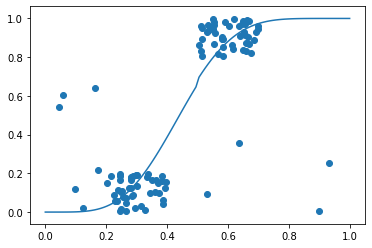

tensor(0.9974, dtype=torch.float64, grad_fn=<DivBackward0>)


In [85]:
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


br = BetaRegression()
data = data_generator(100, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45])
#data = torch.from_numpy(data).float().to(device)
%time loss = br.fit(data[:, 0], data[:, 1], lr=0.1, num_epochs=100)

plt.scatter(data[:, 0], data[:, 1])
plt.plot(torch.tensor(np.linspace(0, 1, 100)), [br.PredictProba(torch.tensor(x_i)) for x_i in np.linspace(0, 1, 100)])
plt.show()
print(br.PredictProba(0.8))

#plt.scatter(data[:, 0], data[:, 1])
#plt.plot(torch.tensor(np.linspace(0.01, 1, 100)), Beta(np.linspace(0.01, 1, 100)))
#plt.show()

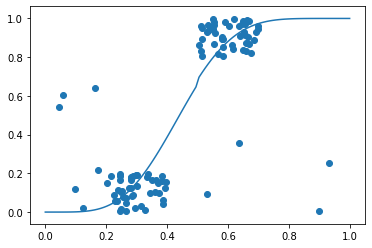

tensor(0.9974, dtype=torch.float64, grad_fn=<DivBackward0>)
[31.47524472809771, 27.812442838453634, 25.531991509527245, 23.724994420853967, 22.34264019837171, 20.778828597584337, 19.807629984277234, 19.104693342889792, 18.54947989209137, 18.093039581800397, 17.709790446948528, 17.369175004689467, 17.07466919380642, 16.809421217245973, 16.567693302577048, 16.36240584638641, 16.184351823814037, 16.014813649038608, 15.865176047021354, 15.728056896331275, 15.600720395664295, 15.48033820130489, 15.369976095933207, 15.267139806972748, 15.167187244845815, 15.078137292104074, 14.996932986345007, 14.922849354034655, 14.852789424590812, 14.78543192236137, 14.725023697055617, 14.675409685009246, 14.631328212569487, 14.589292614800945, 14.567890707392335, 14.502625827369183, 14.479506008661067, 14.44410891062429, 14.410962447370483, 14.384005582322208, 14.35790317872707, 14.332455479734486, 14.308626545431705, 14.285928272626938, 14.26432879567088, 14.241894122577218, 14.221546958296448, 14.203383

In [91]:
plt.scatter(data[:, 0], data[:, 1])
plt.plot(torch.tensor(np.linspace(0, 1, 100)), [br.PredictProba(torch.tensor(x_i)) for x_i in np.linspace(0, 1, 100)])
plt.show()
print(br.PredictProba(0.8))
print(loss)

In [ ]:
print(br.alpha, br.beta) #0.4903 0.6874
al = 40
be = 0.1
t = torch.tensor(np.linspace(0.01, 1, 100), dtype=float)
my  = []
sci = []

for t_i in t:
    my_i  = Beta(al, be, t_i)
    sci_i = scipy.stats.beta.cdf(t_i, al, be)
    print(my_i.item(), sci_i)
    if t_i != 0.01 and my_i < my[-1]:
        print("BAD x =", t_i)
    my.append(my_i)
    sci.append(sci_i)

plt.plot(t, my, label="My beta", c="g")
plt.plot(t, sci, label="Scipy beta", c="r")
plt.legend()
plt.show()

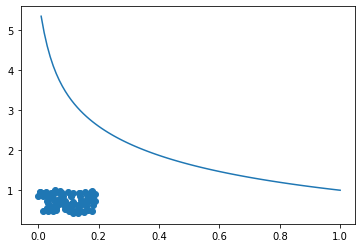

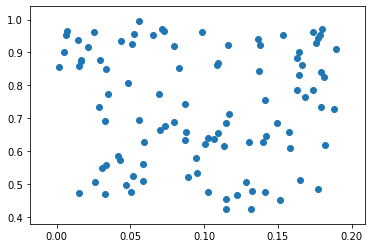

In [710]:
plt.scatter(data[:, 0], data[:, 1])
plt.plot(torch.tensor(np.linspace(0.01, 1, 100)), Beta(0.001, 54, torch.tensor(np.linspace(0.01, 1, 100))))
plt.show()

plt.scatter(data[:, 0], data[:, 1])
plt.plot(torch.tensor(np.linspace(0.01, 1, 100)), BetaConst(np.linspace(0.01, 1, 100)))
plt.show()

In [635]:
print(br.alpha.item(), br.beta.item())

0.9721584667714697 0.9383610586134254


In [46]:
import tensorflow as tf
import tensorflow_probability as tfp
from scipy import stats
from tensorflow_probability.python import distributions
bet = distributions.Beta(InitAB[0], InitAB[1])
print("tfp.Beta.cdf =", bet.cdf(a))
print("scipy beta.cdf = ", stats.beta.cdf(a, 0.2, 0.7))

tfp.Beta.cdf = tf.Tensor([0.33177936 0.44198978 0.52523714 1.        ], shape=(4,), dtype=float32)
scipy beta.cdf =  [0.56866709 0.65687103 0.71666647 1.        ]


In [41]:
a = tf.constant(0.4, dtype=tf.float32)
b = tf.constant(0.2, dtype=tf.float32)
#a = tf.constant([np.random.random(1)[0], np.random.random(1)[0]], dtype=tf.float32, name="ab")
print(np.random.random(1)[0])
#x = [0.1, 0.2, 0.3, 0.4, 0.2, 0.1, 0.1, 0.1, 0.5, 0.6]
x = 0.5
from tensorflow_probability.python import distributions

for _ in np.arange(10):
    with tf.GradientTape() as g:
        g.watch(a)
        with tf.GradientTape() as gg:
            gg.watch(b)
            bet = distributions.Beta(a, b)
            y = tf.constant(stats.beta.cdf(x, a, b)) #bet.cdf(x)
            print("y =", y)
            #mae_object = tf.keras.losses.MeanAbsoluteError()
            #loss_func  = tf.reduce_mean(tf.abs(y - x))
            #print("loss =", loss_func)
            grad_a = g.gradient(y, a)
            #grad_b = g.gradient(z, b)
            print("grad_a = ", grad_a)
            a -= grad_a
            print(a)

NameError: name 'tf' is not defined

In [193]:
def beta_func(alpha, beta):
    return tfp.distributions.Beta(alpha, beta, validate_args=True).cdf(x)

In [230]:
tfp.math.value_and_gradient(beta_func, (0.5, 0.4))

(<tf.Tensor: shape=(), dtype=float32, numpy=0.4365415>, [None, None])

In [773]:
def integrate(fun, a, b, N=100):
    res = 0
    h = (b - a) / N
    
    for i in np.linspace(a, b, N):
        res += fun(a + i) * h
    return res


def DBeta__(alpha, beta, x):
    return (x ** (alpha - 1)) * ((1 - x) ** (beta - 1))

def RETBETATEST(alpha, beta, x):
    return DBeta__(alpha+0.1, beta+0.1, x) + DBeta__(alpha, beta, x + 0.001)

def IncompleteBeta__(alpha, beta, x, N=100):
    res1 = 0
    res2 = 0
    h = x / N
    i = 1
    last = x
    while h * i < last:
        #print("i =", i)
        res1 += DBeta__(alpha, beta, h * i) * h
        i += 1
    res2 = res1.clone()
    
    while h * i < 1:
        res2 += DBeta__(alpha, beta, h * i) * h
        i += 1
    
    #print("res1 =", res1, "res2 =", res2)
    #step = [torch.min(h).item()] * x.shape[0]
    #print("step =", step)
    #step = torch.tensor(step, dtype=float)
    #i = 1
    #ones = torch.ones(size=x.shape, dtype=float)
    #while (i * step < ones).all():
    #    res2 += DBeta__(alpha, beta, i * step) * step
    #    i += 1
    
    return res1 / res2

def Beta(alpha, beta, x):
    #if x == 0:
    #    return 0
    #print(IncompleteBeta__(alpha, beta, torch.ones(size=x.shape, dtype=float)))
    #print(IncompleteBeta__(alpha, beta, x))
    return IncompleteBeta__(alpha, beta, x) #/ IncompleteBeta__(alpha, beta, torch.ones(size=x.shape, dtype=float))


In [26]:
t = torch.tensor([1, 0.4, 0.01, 1, 0.9, 0.8, 0.5, 0.3, 0.2, 0.1, 0.001, 0], dtype=float)
for t_i in t:
    print(Beta(0.4, 6.6, t_i))
print(stats.beta.cdf(t, 0.4, 6.6))
#print(stats.beta.cdf(2.9, 1.9, 1))

tensor(1., dtype=torch.float64)
tensor(0.9901, dtype=torch.float64)
tensor(0.3358, dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1.0000, dtype=torch.float64)
tensor(1.0000, dtype=torch.float64)
tensor(0.9972, dtype=torch.float64)
tensor(0.9700, dtype=torch.float64)
tensor(0.9175, dtype=torch.float64)
tensor(0.7791, dtype=torch.float64)
tensor(0.1320, dtype=torch.float64)
tensor(0., dtype=torch.float64)
[1.         0.99231165 0.36721892 1.         0.99999996 0.9999961
 0.99792063 0.97581439 0.93083676 0.80575272 0.14830013 0.        ]


In [716]:
def BetaConst(x):
    return Beta(1.5, 0.8, torch.tensor(x))
#ApproxPlot(torch.tensor(data[:, 0]), torch.tensor(data[:, 1]), BetaConst)

tensor([0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026,
        0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026,
        0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026,
        0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026,
        0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026,
        0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026,
        0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026,
        0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026,
        0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026,
        0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026,
        0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026,
        0.0026], dtype=torch.float64)
tensor([0.0005, 0.0011, 0.0016, 0.0020, 0.0023, 0.0025, 0.0026, 0.0027, 0.0027,
  

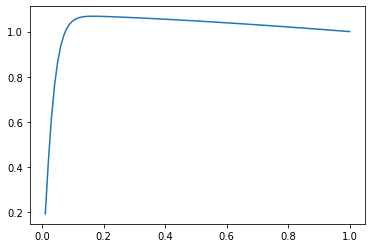

In [717]:
def BetaConst(x):
    return Beta(1.5, 45.8, torch.tensor(x))
plt.plot(torch.tensor(np.linspace(0.01, 1, 100)), BetaConst(np.linspace(0.01, 1, 100)))

In [427]:
if !isinstance(t, torch.Tensor):
    print("fd")

SyntaxError: invalid syntax (<ipython-input-427-a9e8bd4d1881>, line 1)